In [66]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from flask import Flask, request, jsonify
import joblib
import traceback
df = pd.read_csv (r'C:\Users\Anar\Desktop\Code Academy\Week 10\01.03.2024\Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [67]:

# Dummy encoding for the 'Category' column
dummy_df = pd.get_dummies(df['country'], prefix='Category')

# Concatenate the original DataFrame with the dummy variables
df = pd.concat([df, dummy_df], axis=1)

# Drop the original 'Category' column if needed
df.drop('country', axis=1, inplace=True)

print(df)


      customer_id  credit_score  gender  age  tenure    balance  \
0        15634602           619  Female   42       2       0.00   
1        15647311           608  Female   41       1   83807.86   
2        15619304           502  Female   42       8  159660.80   
3        15701354           699  Female   39       1       0.00   
4        15737888           850  Female   43       2  125510.82   
...           ...           ...     ...  ...     ...        ...   
9995     15606229           771    Male   39       5       0.00   
9996     15569892           516    Male   35      10   57369.61   
9997     15584532           709  Female   36       7       0.00   
9998     15682355           772    Male   42       3   75075.31   
9999     15628319           792  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  \
0                   1            1              1         101348.88      1   
1                   1            0     

In [68]:
# List of columns to replace values in
columns_to_replace = ['Category_France', 'Category_Germany', 'Category_Spain']

# Replace True with 1 and False with 0 in specific columns
for column in columns_to_replace:
    df[column] = df[column].replace({True: 1, False: 0})

print(df)
df

      customer_id  credit_score  gender  age  tenure    balance  \
0        15634602           619  Female   42       2       0.00   
1        15647311           608  Female   41       1   83807.86   
2        15619304           502  Female   42       8  159660.80   
3        15701354           699  Female   39       1       0.00   
4        15737888           850  Female   43       2  125510.82   
...           ...           ...     ...  ...     ...        ...   
9995     15606229           771    Male   39       5       0.00   
9996     15569892           516    Male   35      10   57369.61   
9997     15584532           709  Female   36       7       0.00   
9998     15682355           772    Male   42       3   75075.31   
9999     15628319           792  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  \
0                   1            1              1         101348.88      1   
1                   1            0     

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Category_France,Category_Germany,Category_Spain
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,15569892,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,15584532,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,15682355,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [69]:
# We use .map() on a specific column and provide a dictionary to perform the mapping
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Category_France,Category_Germany,Category_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [70]:
# Round the 'balance' column to the nearest whole number
df['balance'] = df['balance'].round()

print(df)
df

      customer_id  credit_score  gender  age  tenure   balance  \
0        15634602           619       0   42       2       0.0   
1        15647311           608       0   41       1   83808.0   
2        15619304           502       0   42       8  159661.0   
3        15701354           699       0   39       1       0.0   
4        15737888           850       0   43       2  125511.0   
...           ...           ...     ...  ...     ...       ...   
9995     15606229           771       1   39       5       0.0   
9996     15569892           516       1   35      10   57370.0   
9997     15584532           709       0   36       7       0.0   
9998     15682355           772       1   42       3   75075.0   
9999     15628319           792       0   28       4  130143.0   

      products_number  credit_card  active_member  estimated_salary  churn  \
0                   1            1              1         101348.88      1   
1                   1            0              1  

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Category_France,Category_Germany,Category_Spain
0,15634602,619,0,42,2,0.0,1,1,1,101348.88,1,1,0,0
1,15647311,608,0,41,1,83808.0,1,0,1,112542.58,0,0,0,1
2,15619304,502,0,42,8,159661.0,3,1,0,113931.57,1,1,0,0
3,15701354,699,0,39,1,0.0,2,0,0,93826.63,0,1,0,0
4,15737888,850,0,43,2,125511.0,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.0,2,1,0,96270.64,0,1,0,0
9996,15569892,516,1,35,10,57370.0,1,1,1,101699.77,0,1,0,0
9997,15584532,709,0,36,7,0.0,1,0,1,42085.58,1,1,0,0
9998,15682355,772,1,42,3,75075.0,2,1,0,92888.52,1,0,1,0


In [71]:
# Round the 'balance' column to the nearest whole number
df['estimated_salary'] = df['estimated_salary'].round()

print(df)
df

      customer_id  credit_score  gender  age  tenure   balance  \
0        15634602           619       0   42       2       0.0   
1        15647311           608       0   41       1   83808.0   
2        15619304           502       0   42       8  159661.0   
3        15701354           699       0   39       1       0.0   
4        15737888           850       0   43       2  125511.0   
...           ...           ...     ...  ...     ...       ...   
9995     15606229           771       1   39       5       0.0   
9996     15569892           516       1   35      10   57370.0   
9997     15584532           709       0   36       7       0.0   
9998     15682355           772       1   42       3   75075.0   
9999     15628319           792       0   28       4  130143.0   

      products_number  credit_card  active_member  estimated_salary  churn  \
0                   1            1              1          101349.0      1   
1                   1            0              1  

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Category_France,Category_Germany,Category_Spain
0,15634602,619,0,42,2,0.0,1,1,1,101349.0,1,1,0,0
1,15647311,608,0,41,1,83808.0,1,0,1,112543.0,0,0,0,1
2,15619304,502,0,42,8,159661.0,3,1,0,113932.0,1,1,0,0
3,15701354,699,0,39,1,0.0,2,0,0,93827.0,0,1,0,0
4,15737888,850,0,43,2,125511.0,1,1,1,79084.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.0,2,1,0,96271.0,0,1,0,0
9996,15569892,516,1,35,10,57370.0,1,1,1,101700.0,0,1,0,0
9997,15584532,709,0,36,7,0.0,1,0,1,42086.0,1,1,0,0
9998,15682355,772,1,42,3,75075.0,2,1,0,92889.0,1,0,1,0


In [72]:
# Clip age column to a specific range
df['age'] = df['age'].clip(lower=0, upper=65)

print("\nDataFrame after clipping ages:")
print(df)


DataFrame after clipping ages:
      customer_id  credit_score  gender  age  tenure   balance  \
0        15634602           619       0   42       2       0.0   
1        15647311           608       0   41       1   83808.0   
2        15619304           502       0   42       8  159661.0   
3        15701354           699       0   39       1       0.0   
4        15737888           850       0   43       2  125511.0   
...           ...           ...     ...  ...     ...       ...   
9995     15606229           771       1   39       5       0.0   
9996     15569892           516       1   35      10   57370.0   
9997     15584532           709       0   36       7       0.0   
9998     15682355           772       1   42       3   75075.0   
9999     15628319           792       0   28       4  130143.0   

      products_number  credit_card  active_member  estimated_salary  churn  \
0                   1            1              1          101349.0      1   
1                  

In [73]:
# Clip credit_score column to a specific range
df['credit_score'] = df['credit_score'].clip(lower=400, upper=1000)

print("\nDataFrame after clipping credit_score:")
print(df)


DataFrame after clipping credit_score:
      customer_id  credit_score  gender  age  tenure   balance  \
0        15634602           619       0   42       2       0.0   
1        15647311           608       0   41       1   83808.0   
2        15619304           502       0   42       8  159661.0   
3        15701354           699       0   39       1       0.0   
4        15737888           850       0   43       2  125511.0   
...           ...           ...     ...  ...     ...       ...   
9995     15606229           771       1   39       5       0.0   
9996     15569892           516       1   35      10   57370.0   
9997     15584532           709       0   36       7       0.0   
9998     15682355           772       1   42       3   75075.0   
9999     15628319           792       0   28       4  130143.0   

      products_number  credit_card  active_member  estimated_salary  churn  \
0                   1            1              1          101349.0      1   
1          

        customer_id  credit_score        gender           age        tenure  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.569094e+07    650.590500      0.545700     38.756800      5.012800   
std    7.193619e+04     96.480378      0.497932      9.987153      2.892174   
min    1.556570e+07    400.000000      0.000000     18.000000      0.000000   
25%    1.562853e+07    584.000000      0.000000     32.000000      3.000000   
50%    1.569074e+07    652.000000      1.000000     37.000000      5.000000   
75%    1.575323e+07    718.000000      1.000000     44.000000      7.000000   
max    1.581569e+07    850.000000      1.000000     65.000000     10.000000   

             balance  products_number  credit_card  active_member  \
count   10000.000000     10000.000000  10000.00000   10000.000000   
mean    76485.893100         1.530200      0.70550       0.515100   
std     62397.409041         0.581654      0.45584       0.499797   
min         

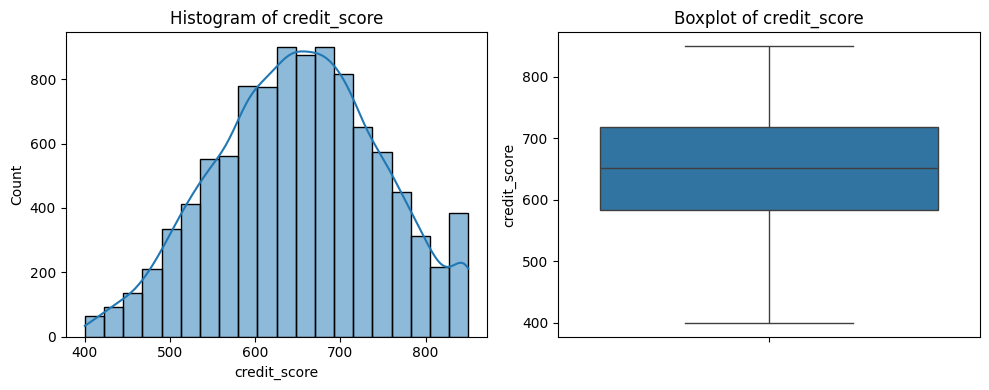

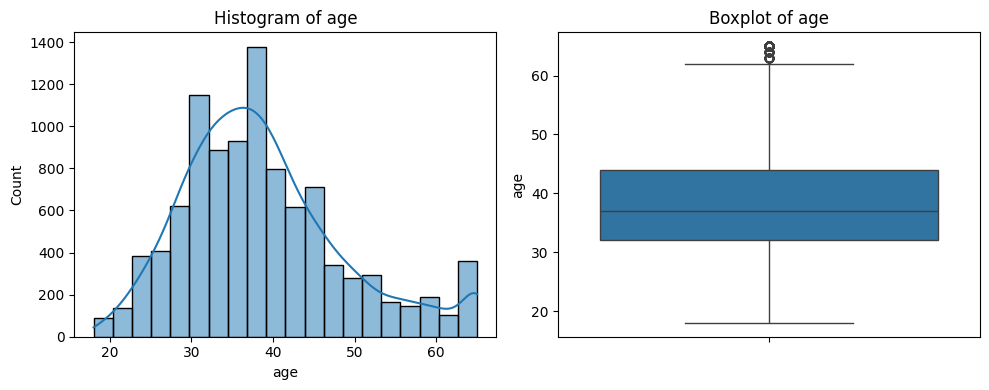

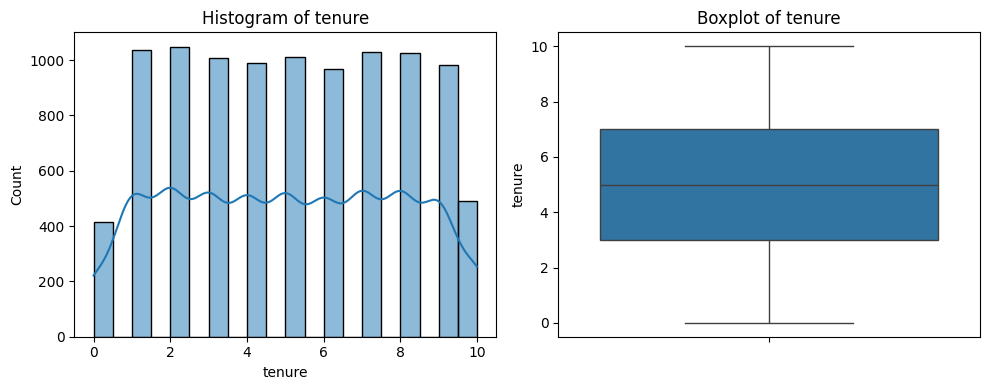

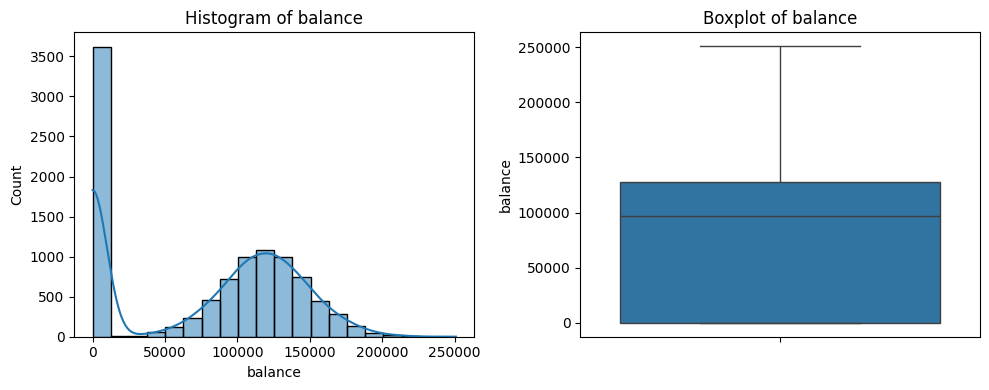

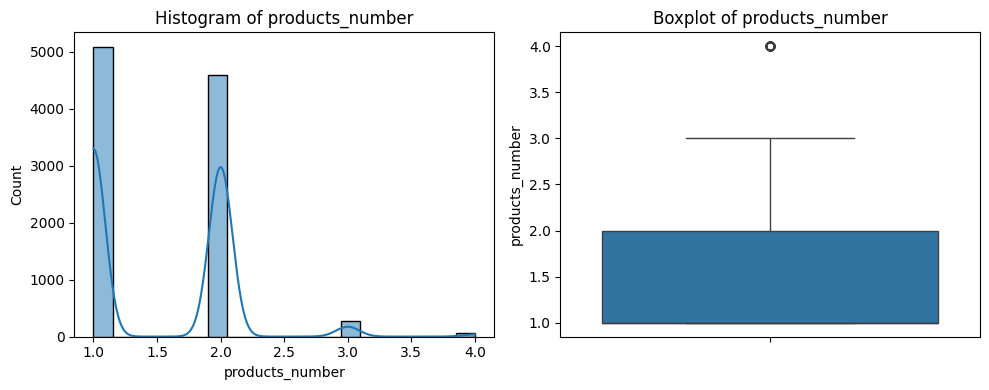

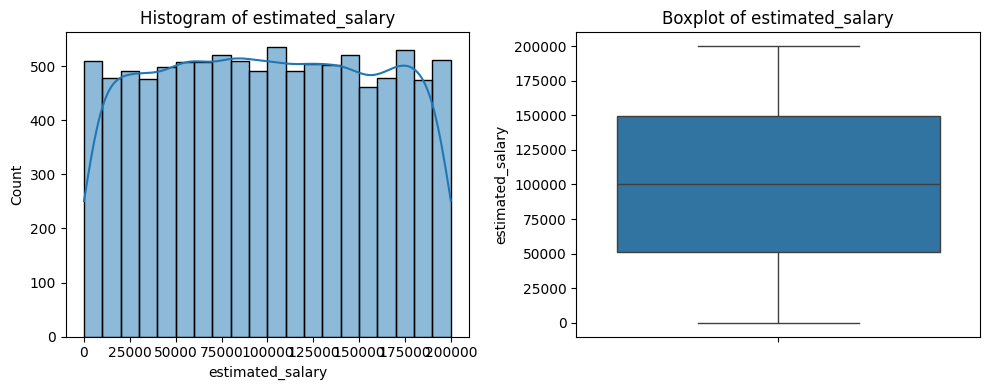

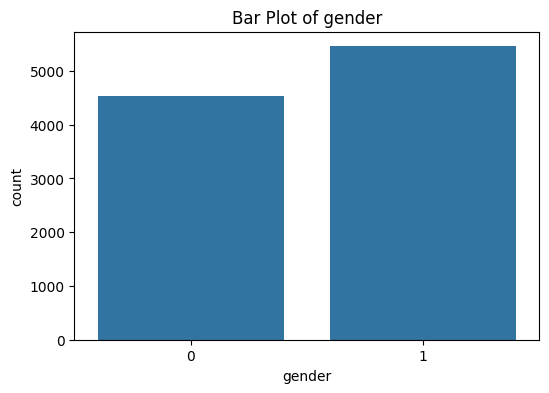

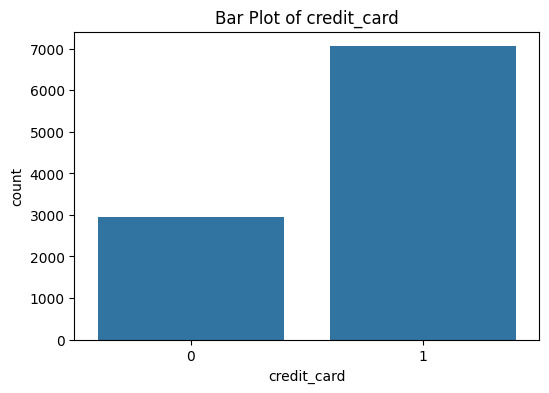

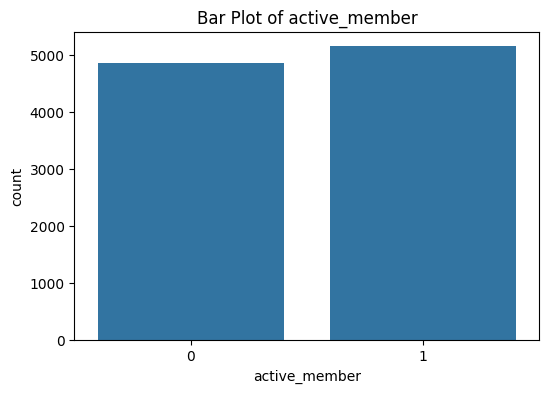

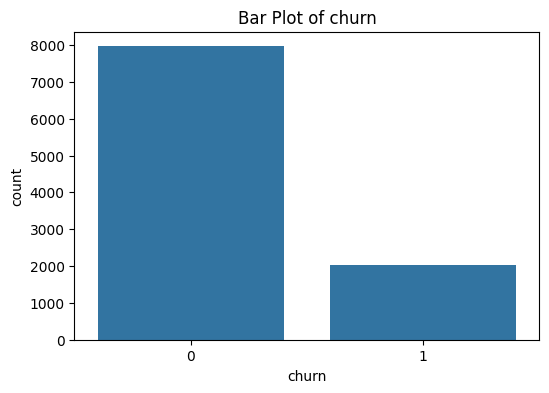

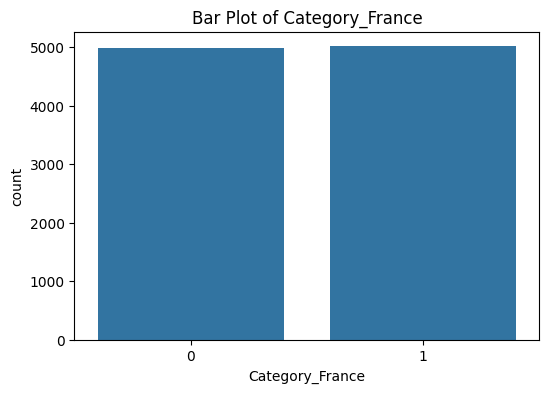

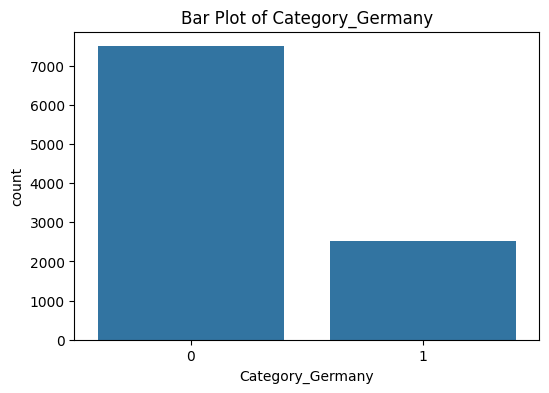

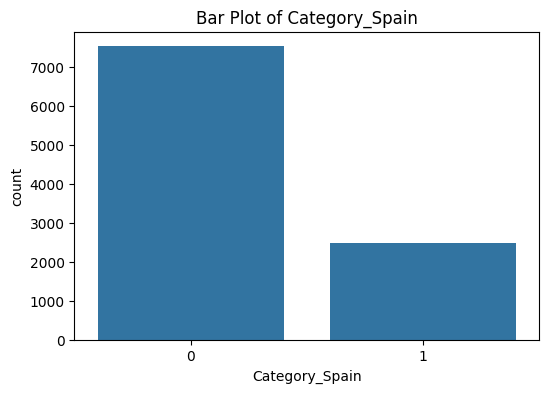

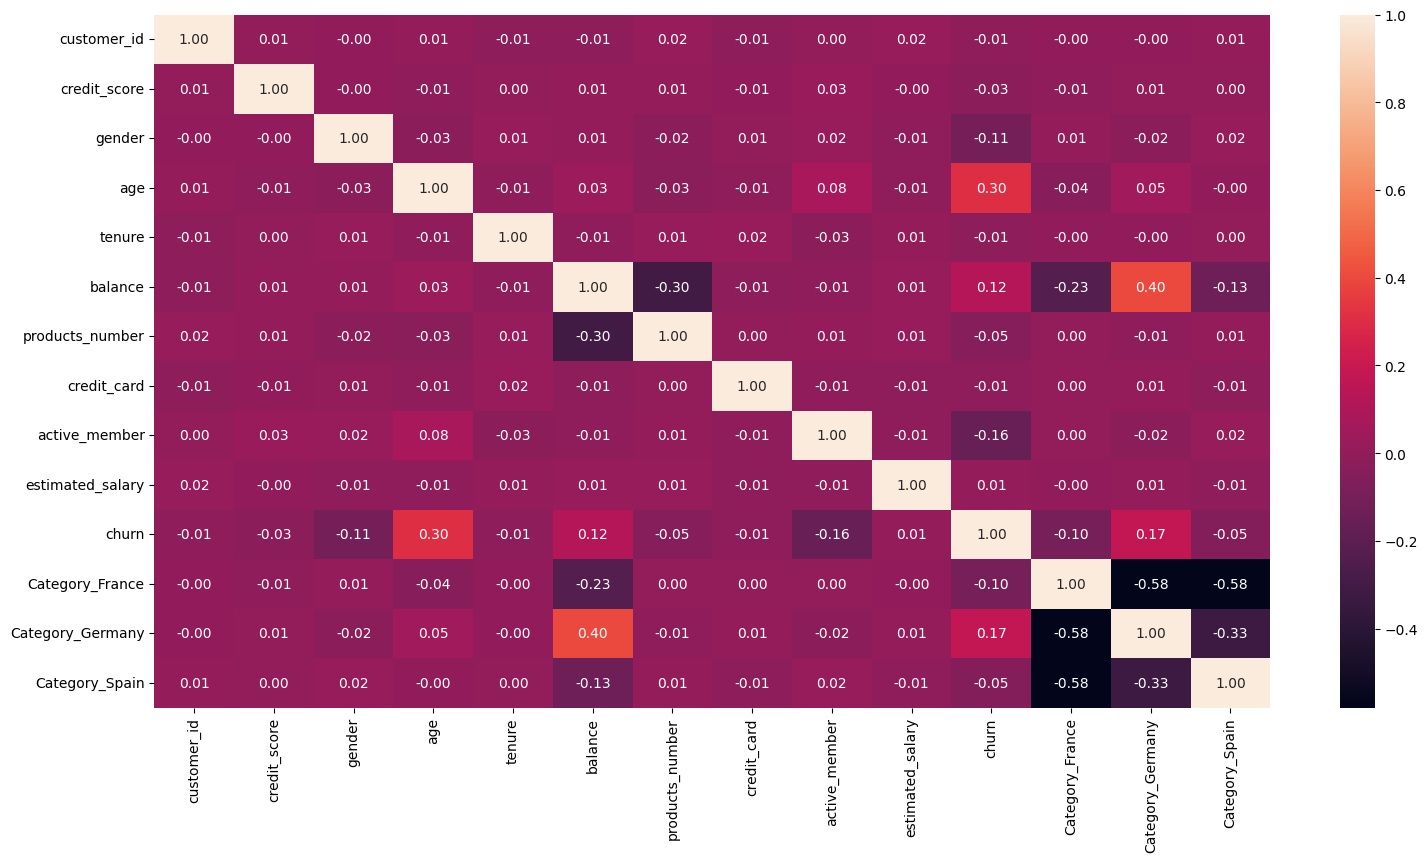

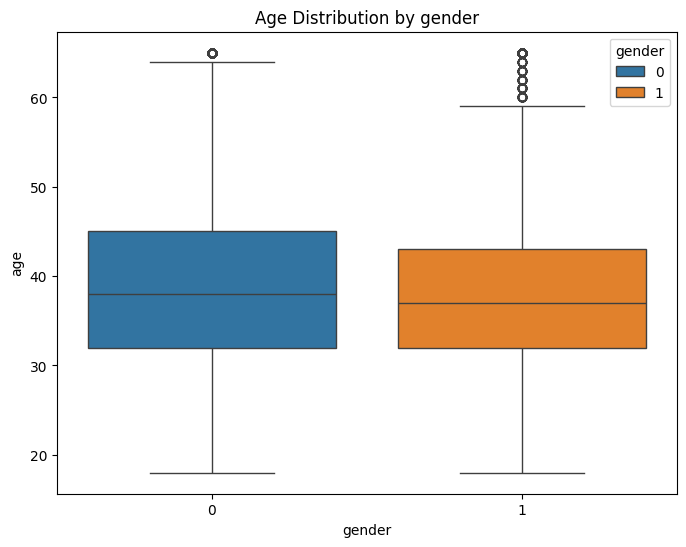

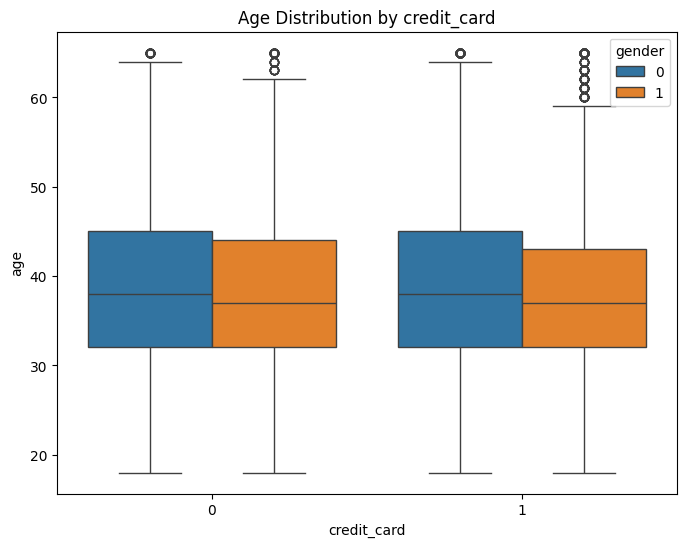

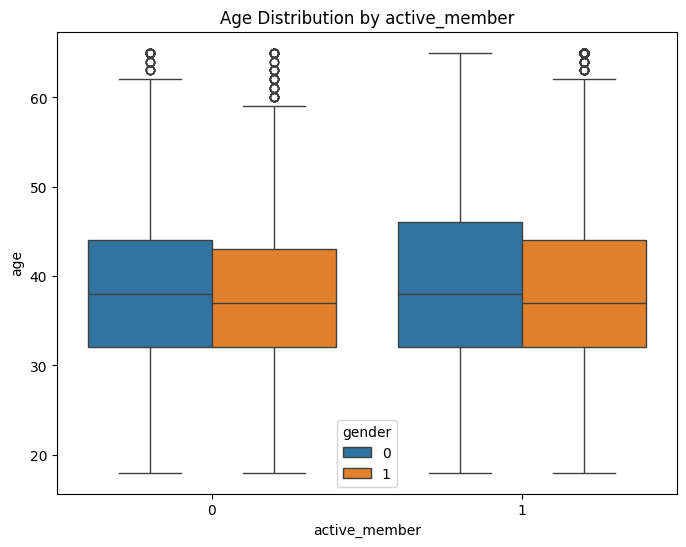

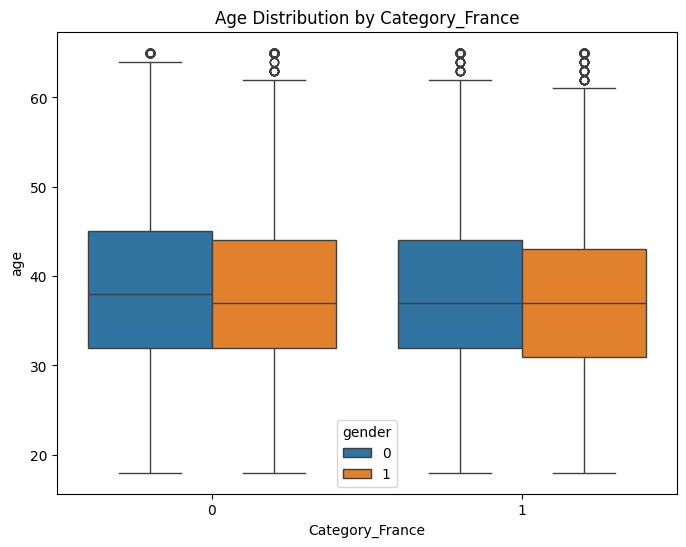

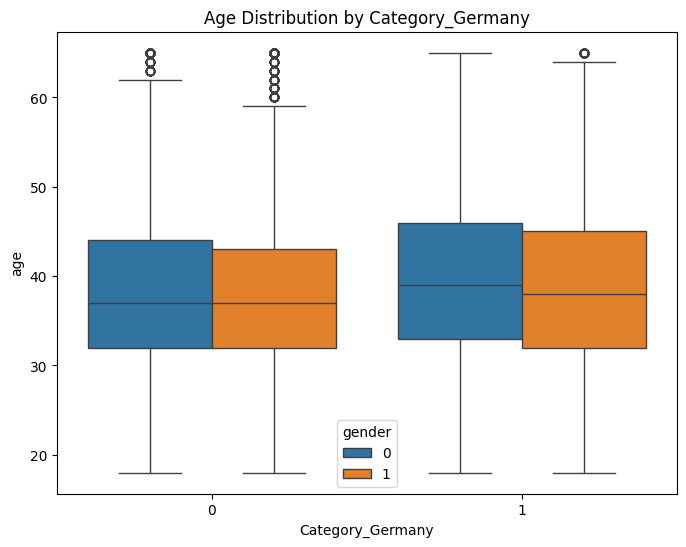

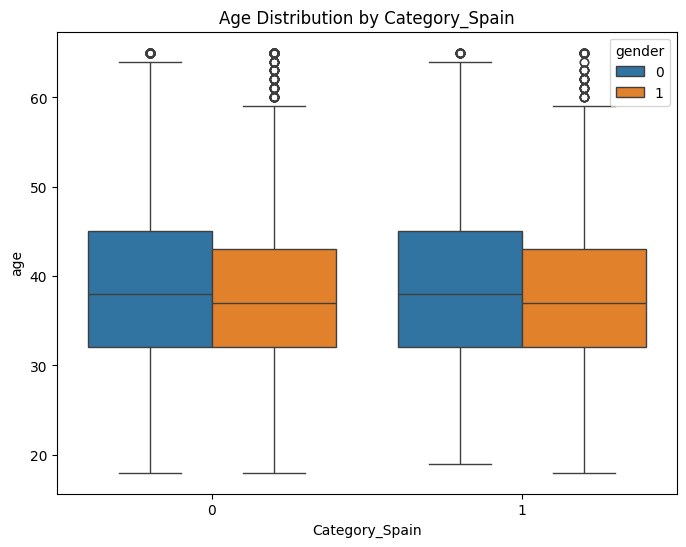

In [74]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Histograms and Boxplots for numerical variables
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

# Bar plots for categorical variables
categorical_cols = ['gender', 'credit_card', 'active_member', 'churn', 'Category_France', 'Category_Germany', 'Category_Spain']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Bar Plot of {col}')
    plt.show()

# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(18, 9))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

# Segment Analysis
segment_cols = ['gender', 'credit_card', 'active_member', 'Category_France', 'Category_Germany', 'Category_Spain']
for col in segment_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col, y='age', hue="gender")
    plt.title(f'Age Distribution by {col}')
    plt.show()

In [75]:
# Feature enrichment
# Create a new feature 'credit_balance_ratio' by dividing balance by credit score
df['credit_balance_ratio'] = df['balance'] / df['credit_score']
df

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Category_France,Category_Germany,Category_Spain,credit_balance_ratio
0,15634602,619,0,42,2,0.0,1,1,1,101349.0,1,1,0,0,0.000000
1,15647311,608,0,41,1,83808.0,1,0,1,112543.0,0,0,0,1,137.842105
2,15619304,502,0,42,8,159661.0,3,1,0,113932.0,1,1,0,0,318.049801
3,15701354,699,0,39,1,0.0,2,0,0,93827.0,0,1,0,0,0.000000
4,15737888,850,0,43,2,125511.0,1,1,1,79084.0,0,0,0,1,147.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.0,2,1,0,96271.0,0,1,0,0,0.000000
9996,15569892,516,1,35,10,57370.0,1,1,1,101700.0,0,1,0,0,111.182171
9997,15584532,709,0,36,7,0.0,1,0,1,42086.0,1,1,0,0,0.000000
9998,15682355,772,1,42,3,75075.0,2,1,0,92889.0,1,0,1,0,97.247409


In [76]:
# Extract numerical columns
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Standardization (Z-score normalization)
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Min-Max Scaling (Normalization)
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Robust Scaling
scaler = RobustScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df)

      customer_id  credit_score  gender       age  tenure   balance  \
0        15634602     -0.246269       0  0.416667   -0.75 -0.761481   
1        15647311     -0.328358       0  0.333333   -1.00 -0.104905   
2        15619304     -1.119403       0  0.416667    0.75  0.489349   
3        15701354      0.350746       0  0.166667   -1.00 -0.761481   
4        15737888      1.477612       0  0.500000   -0.75  0.221808   
...           ...           ...     ...       ...     ...       ...   
9995     15606229      0.888060       1  0.166667    0.00 -0.761481   
9996     15569892     -1.014925       1 -0.166667    1.25 -0.312028   
9997     15584532      0.425373       0 -0.083333    0.50 -0.761481   
9998     15682355      0.895522       1  0.416667   -0.50 -0.173322   
9999     15628319      1.044776       0 -0.750000   -0.25  0.258097   

      products_number  credit_card  active_member  estimated_salary  churn  \
0                 0.0            1              1          0.011745  

In [77]:
# Split data into features (X) and target variable (y)
X = df.drop(columns=['churn'])
y = df['churn']

# Perform feature scaling if necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Select algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Cross-validation and parameter tuning
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{name} Cross-Validation Mean Accuracy: {cv_scores.mean()}')

    # Parameter tuning using GridSearchCV
    if name == 'Random Forest':
        param_grid = {'n_estimators': [100, 200, 300],
                      'max_depth': [None, 10, 20],
                      'min_samples_split': [2, 5, 10]}
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        print(f'Best Parameters for {name}: {grid_search.best_params_}')
        best_model = grid_search.best_estimator_
    else:
        best_model = model
    
    # Evaluate the best model
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    print(f'{name} Test Set Classification Report:\n{classification_report(y_test, y_pred)}')

Logistic Regression Cross-Validation Mean Accuracy: 0.8166249999999999
Logistic Regression Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.58      0.22      0.32       393

    accuracy                           0.82      2000
   macro avg       0.71      0.59      0.61      2000
weighted avg       0.78      0.82      0.78      2000

Random Forest Cross-Validation Mean Accuracy: 0.85875
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [78]:
# Save the best model
joblib.dump(best_model, f"{name}_best_model.pkl")

# Save one of the models as the default
joblib.dump(best_model, "default_model.pkl")

['default_model.pkl']

Default model loaded successfully.
FastAPI app encountered an error during execution: run() got an unexpected keyword argument 'debug'


Traceback (most recent call last):
  File "C:\Users\Anar\AppData\Local\Temp\ipykernel_8216\212134543.py", line 34, in <module>
    uvicorn.run(app, host="127.0.0.1", port=5000, debug=True)
TypeError: run() got an unexpected keyword argument 'debug'
